Ataka Dzulfikar

Project Klarifikasi Gambar


In [1]:
! pip install -q kaggle
from google.colab import files

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d anthonytherrien/dog-vs-cat

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/anthonytherrien/dog-vs-cat
License(s): CC-BY-SA-4.0
 97% 348M/360M [00:02<00:00, 161MB/s]
100% 360M/360M [00:02<00:00, 162MB/s]


In [3]:
pip install split-folders

In [20]:
import splitfolders
import tensorflow as tf
import zipfile,os
import pandas as pd
import glob
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [21]:
# digunakan untuk mengekstrak file
local_zip = '/content/dog-vs-cat.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [22]:
base_dir = '/content/dog-vs-cat'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [23]:
input_code = '/content/animals'
output_code = '/content/dog-vs-cat'


In [24]:
splitfolders.ratio(input_code, output=output_code, seed=51, ratio=(.6, .4), group_prefix=None)

Copying files: 1000 files [00:01, 828.52 files/s]


In [25]:
os.listdir('/content/dog-vs-cat/train')


['dog', 'cat']

In [26]:
os.listdir('/content/dog-vs-cat/val')

['dog', 'cat']

In [30]:
train_code = '/content/dog-vs-cat/train/'

cat = glob(train_code + 'cat/*.PNG') + glob(train_code + 'cat/*.png') + glob(train_code + 'cat/*.jpg')

dog = glob(train_code + 'dog/*.PNG') + glob(train_code + 'dog/*.png') + glob(train_code + 'dog/*.jpg')


print("Jumlah gambar blight:", len(cat))
print("Jumlah gambar common rust:", len(dog))

Jumlah gambar blight: 422
Jumlah gambar common rust: 422


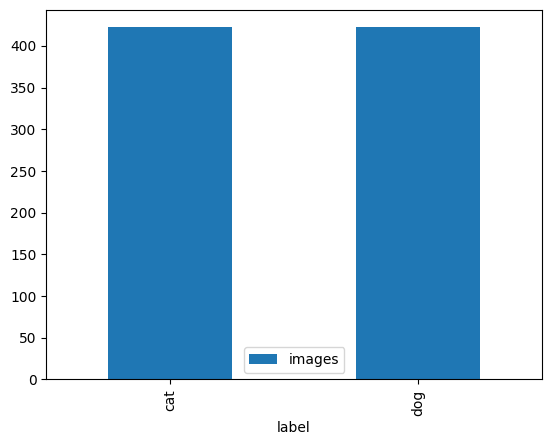

In [36]:
all_photo =  cat + dog

df = pd.DataFrame({'images': all_photo})

df['label'] = ''
for idx, image in enumerate(all_photo):
    if image in cat:
        df.at[idx, 'label'] = 'cat'
    elif image in dog:
        df.at[idx, 'label'] = 'dog'

df.groupby('label').count().plot.bar()
plt.show()

<ipython-input-39-969f984808f3>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i+1)  # Mengubah menjadi 1 baris dengan 4 kolom


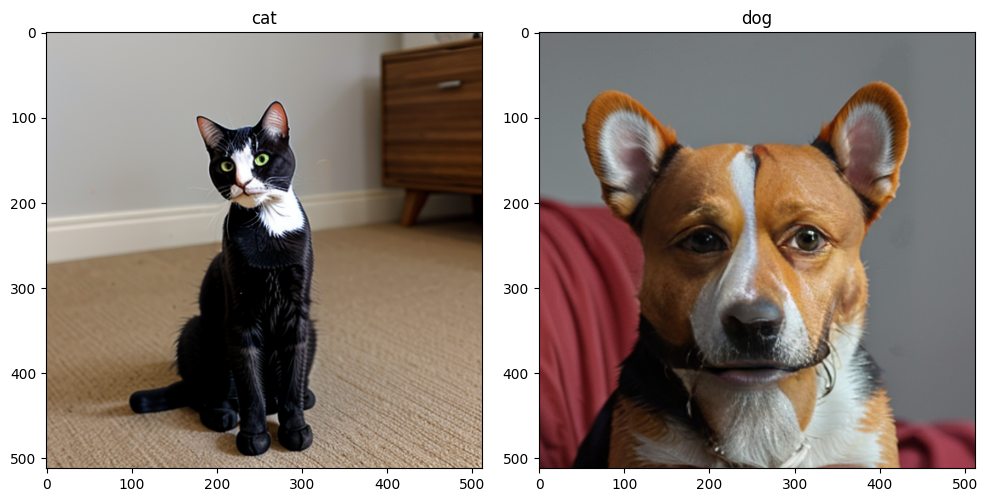

In [39]:
plt.subplots(figsize=(10, 6))

categories = ['cat', 'dog']

for i, category in enumerate(categories):
    plt.subplot(1, 2, i+1)
    x = df[df['label'] == category]['images']

    if not x.empty:
        path = x.values[0]
        img = plt.imread(path)
        plt.imshow(img)
        plt.title(category)
    else:
        plt.text(0.5, 0.5, 'No image', horizontalalignment='center', verticalalignment='center')
        plt.title(f'{category} (No data)')

plt.tight_layout()
plt.show()

In [40]:
# melakukan ujicoba train pada data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
)

val_test = ImageDataGenerator(
  rescale=1./255,
  rotation_range=20,
  horizontal_flip=True,
  shear_range = 0.2,
  fill_mode = 'nearest')

In [41]:
# melakukan pencarian pada isi folder

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

validation_generator = val_test.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

Found 844 images belonging to 2 classes.
Found 644 images belonging to 2 classes.


In [63]:
# membuat model machine learning
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# melakukan compile file yang telah di buat

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [66]:
# menggunakan callback untuk mengecek akurasi epoch, apabila telah mencapai diatas 96 maka akan otomatis berhenti

class stop(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.96):
      print("\nAkurasi diatas 0.96 epoch akan terhenti")
      self.model.stop_training=True
callbacks=stop()

In [76]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

validation_generator = val_test.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')


Found 844 images belonging to 2 classes.
Found 644 images belonging to 2 classes.


In [77]:
print("Total training samples:", train_generator.samples)
print("Total validation samples:", validation_generator.samples)


Total training samples: 844
Total validation samples: 644


In [82]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # Ubah ke 2 kelas
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 15, 15, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,530,178 (51.61 MB)

 Trainable params: 13,530,178 (51.61 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy']
              )

In [87]:
# menggunakan callback untuk mengecek akurasi epoch, apabila telah mencapai diatas 96 maka akan otomatis berhenti

class stop(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.96):
      print("\nAkurasi diatas 0.96 epoch akan terhenti")
      self.model.stop_training=True
callbacks=stop()

In [88]:
# definisi batchfile dan epoch

batchsize = 32
epoch = 20

In [89]:
model.fit(
      train_generator,
      steps_per_epoch= batchsize,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs= epoch, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,callbacks = [callbacks])


Epoch 1/20
32/32 - 22s - 698ms/step - accuracy: 0.5156 - loss: 0.6906 - val_accuracy: 0.5500 - val_loss: 0.6836
Epoch 2/20
32/32 - 20s - 631ms/step - accuracy: 0.5781 - loss: 0.6643 - val_accuracy: 0.5500 - val_loss: 0.6744
Epoch 3/20
32/32 - 20s - 618ms/step - accuracy: 0.6953 - loss: 0.5937 - val_accuracy: 0.7500 - val_loss: 0.5483
Epoch 4/20
32/32 - 22s - 678ms/step - accuracy: 0.7109 - loss: 0.6450 - val_accuracy: 0.7500 - val_loss: 0.5700
Epoch 5/20
32/32 - 20s - 614ms/step - accuracy: 0.7188 - loss: 0.5649 - val_accuracy: 0.8000 - val_loss: 0.4585
Epoch 6/20
32/32 - 21s - 670ms/step - accuracy: 0.7969 - loss: 0.4558 - val_accuracy: 0.7500 - val_loss: 0.5841
Epoch 7/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 - 11s - 355ms/step - accuracy: 0.8158 - loss: 0.4777 - val_accuracy: 0.8000 - val_loss: 0.3759
Epoch 8/20
32/32 - 26s - 816ms/step - accuracy: 0.8203 - loss: 0.4520 - val_accuracy: 0.7000 - val_loss: 0.4974
Epoch 9/20
32/32 - 21s - 658ms/step - accuracy: 0.7969 - loss: 0.4696 - val_accuracy: 0.8500 - val_loss: 0.4165
Epoch 10/20
32/32 - 20s - 622ms/step - accuracy: 0.8359 - loss: 0.3696 - val_accuracy: 1.0000 - val_loss: 0.1293
Epoch 11/20
32/32 - 21s - 669ms/step - accuracy: 0.8125 - loss: 0.4109 - val_accuracy: 0.9000 - val_loss: 0.4243
Epoch 12/20
32/32 - 20s - 619ms/step - accuracy: 0.8047 - loss: 0.3678 - val_accuracy: 0.8000 - val_loss: 0.3370
Epoch 13/20
32/32 - 22s - 678ms/step - accuracy: 0.8516 - loss: 0.4097 - val_accuracy: 0.9000 - val_loss: 0.2805
Epoch 14/20
32/32 - 11s - 356ms/step - accuracy: 0.8947 - loss: 0.2617 - val_accuracy: 0.8500 - val_loss: 0.3234
Epoch 15/20
32/32 - 21s - 669ms/step - accuracy: 0.9062 - loss: 0.2527 - val_accuracy: 0.8500 - val_loss: 0.43

Saving 00037-200124347.png to 00037-200124347.png


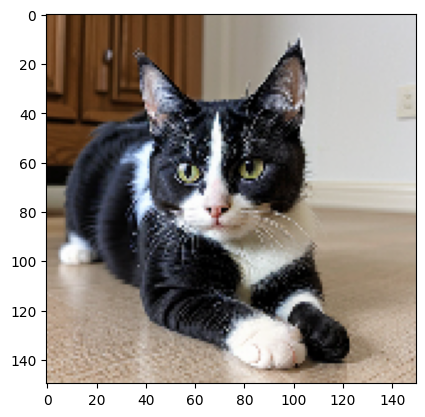

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
00037-200124347.png
Gambar dibawah adalah Kucing


In [97]:
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Mengunggah file
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    # Load gambar
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    plt.show()  # Menampilkan gambar

    # Konversi gambar ke array
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)  # Menambahkan dimensi untuk batch

    # Prediksi kelas gambar
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    prediksi = np.argmax(classes[0])

    print(fn)
    if prediksi == 0:
        print('Gambar dibawah adalah Kucing')
    elif prediksi == 1:
        print('Gambar dibawah adalah Anjing')
    else:
        print('Gambar dibawah tidak diketahui')


In [98]:
model.save('cat_dog.h5')